In [39]:
import numpy as np
import matplotlib.pyplot as plt
from struct import unpack
from pylab import *
%matplotlib inline

# Getting Started
## Order of Events:
1. Distance
2. velocity
3. Acceleration

## Pseudocode:
Vmid = vi + 1/2 a t

d = di + Vmid t

a = calcAccel()

Use a to calculate next Vmid

d,v will hve nested lists


a = (GMr) / r**3

In [40]:
## variables

#M1 = 
#M2 
d = [[0,0],[1,0]]
v = [[0,0],[0,30]]

In [52]:
## Constant 
G = 2 * 10 ** (-45)
earthMass = 5.972 * 10 ** 24
sunMass = 1.99 * 10**30

earthPos = np.array([1,0])
sunPos = np.array([0,0])

vEarth = np.array([0, 1.99 * 10 ** -7])
vSun = np.array([0,0])

mass = [earthMass, sunMass]
mass = np.array(mass)
pos = [earthPos,sunPos]
pos = np.array(pos)
velocity = [vEarth,vSun]
velocity = np.array(velocity)


finalTime = 50 * 365 * 24 * 60 * 60
timeStep = 60 * 60 * 24


In [53]:
def calcAccel(x,m):
    a =np.zeros_like(x)
    nbodies = x.shape[0]
    for i in range(nbodies):
        for j in range(nbodies):
            r=x[j]-x[i]
            if i !=j:
                a[i]=a[i]+r*G*m[j]/pow(np.vdot(r,r),1.5)
    return a

In [54]:
##
def leapFrog(a,d1,v1,t, mass):
    vMid = v1 + (1/2) * a * t  
    d =  d1 + vMid * t          # d is a vector
    a = calcAccel(d, mass)
    v = vMid + .5 * a * t
    return d,v,a



In [55]:
## Running data Collection
t = 0
a = calcAccel(pos,mass)
posResult = []

while(t < finalTime):
    pos,vel,a = leapFrog(a,pos,velocity,timeStep,mass)
    posResult.append(pos)
    t = t + timeStep
np.array(posResult)



array([[[  1.00000000e+00,   1.71936000e-02],
        [  0.00000000e+00,   0.00000000e+00]],

       [[  1.00000000e+00,   3.43872000e-02],
        [  0.00000000e+00,   0.00000000e+00]],

       [[  1.00000000e+00,   5.15808000e-02],
        [  0.00000000e+00,   0.00000000e+00]],

       ..., 
       [[  1.00000000e+00,   3.13748813e+02],
        [  0.00000000e+00,   0.00000000e+00]],

       [[  1.00000000e+00,   3.13766006e+02],
        [  0.00000000e+00,   0.00000000e+00]],

       [[  1.00000000e+00,   3.13783200e+02],
        [  0.00000000e+00,   0.00000000e+00]]])

In [58]:
posResult[::,0,0]

TypeError: list indices must be integers, not tuple

In [49]:
#sunLoc = posResult[::,0,1]
#print sunLoc
np.shape(posResult)
print posResult[::,0]


TypeError: list indices must be integers, not tuple

# Options for Animation
1. add jupiter
2. animate earth/sun/jupiter
3. animate black holes

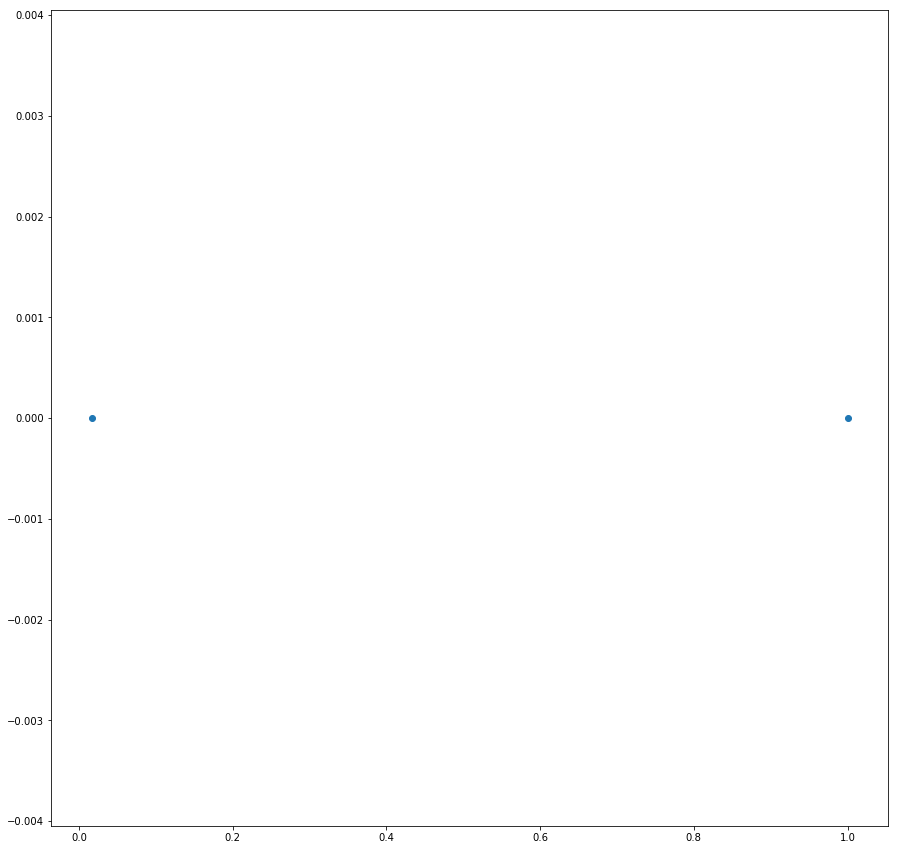

In [38]:
fig = plt.figure(figsize=(15,15))

plt.scatter(sunLoc[0],sunLoc[1])